In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

c:\Users\user\Desktop\Python_Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('lukebarousse/data_jobs') # Loading Data
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])#convert to datetime
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()  #analysing only USA jobs as USA has the most jobs in the posting from below

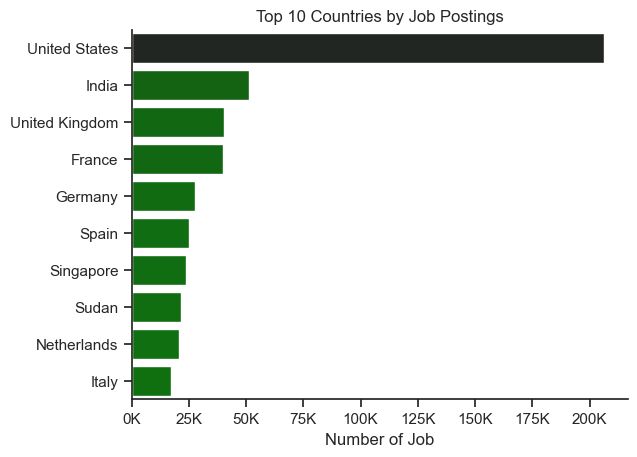

In [5]:
df_country = df['job_country'].value_counts().head(10).to_frame()

sns.barplot(data=df_country, x= 'count', y= 'job_country',hue= 'count', palette= 'dark:green_r', legend= False )
sns.despine()
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))
plt.xlabel('Number of Job')
plt.ylabel('')
plt.title('Top 10 Countries by Job Postings')
plt.show()

In [3]:
df_DA_USA.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,67816,4350.000000,3980.000000
mean,2023-06-15 03:16:27.397118464,94553.964924,38.312172
min,2023-01-01 00:00:04,25000.000000,8.000000
25%,2023-03-12 18:02:09.750000128,71262.500000,24.000000
50%,2023-06-11 18:49:23.500000,90000.000000,33.000000
75%,2023-09-08 19:01:58.249999872,112500.000000,50.000000
max,2023-12-31 23:31:54,375000.000000,391.000000
std,NaN,33248.650655,18.758708


In [4]:
df_DA_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [25]:
df_loc = df_DA_USA['job_location'].value_counts().head(10).to_frame()

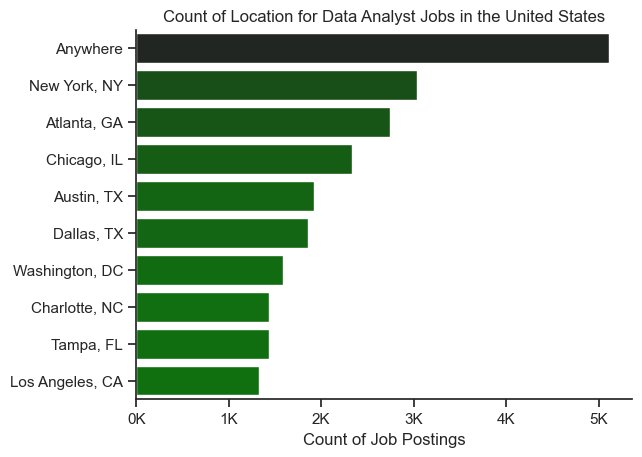

In [ ]:
sns.barplot(data=df_loc, x= 'count', y= 'job_location',hue= 'count', palette= 'dark:green_r', legend= False )
sns.despine()
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))
plt.xlabel('Number of Job')
plt.ylabel('')
plt.title('Count of Location for Data Analyst Jobs in the United States')
plt.show()

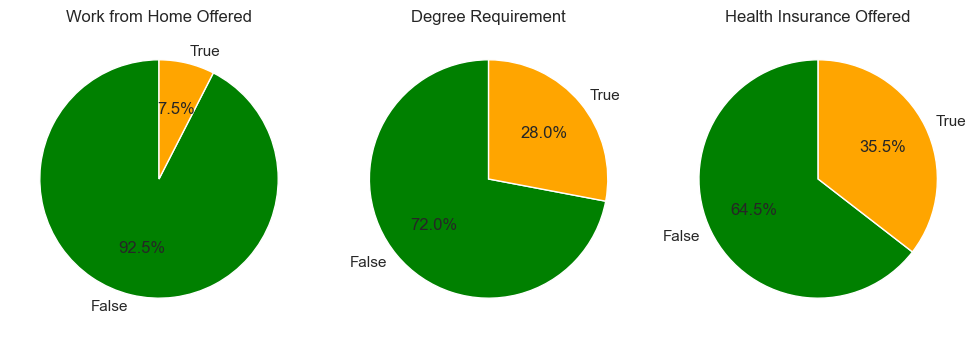

In [7]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

#df[dict_column]

for index, item in enumerate(dict_column.items()):  #can use index, (column, title)
    df_plot = df_DA_USA[item[0]].value_counts()
    df_plot.plot(kind= 'pie',  ax = ax[index], autopct='%1.1f%%', figsize= (10,5),  startangle=90, colors=['green', 'orange'], title= item[1])
    ax[index].set_ylabel('')
fig.tight_layout()


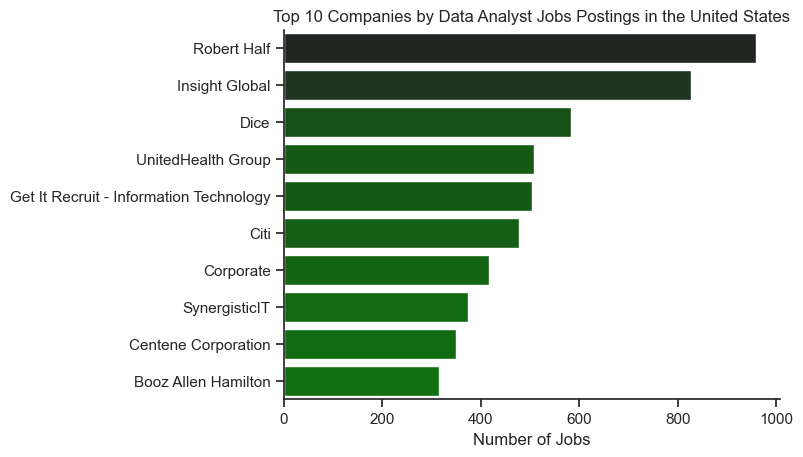

In [78]:
df_comp = df_DA_USA['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_comp, x= 'count', y= 'company_name',hue= 'count', palette= 'dark:green_r', legend= False )
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Top 10 Companies by Data Analyst Jobs Postings in the United States')
plt.show()

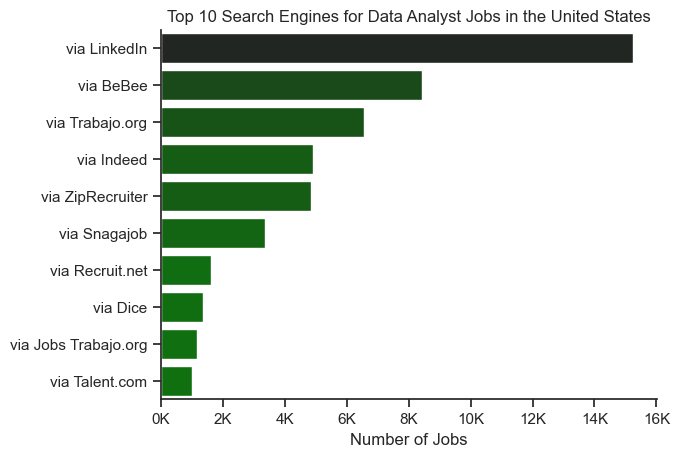

In [80]:
df_platform = df_DA_USA['job_via'].value_counts().head(10).to_frame()
sns.barplot(data=df_platform, x= 'count', y= 'job_via',hue= 'count', palette= 'dark:green_r', legend= False )
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Top 10 Search Engines for Data Analyst Jobs in the United States')
plt.show()